# Logistic Regressionn from Scratch

In [2]:
import numpy as np
%matplotlib widget
from math import exp
import matplotlib.pyplot as plt
import math
import copy

## Why Logistic Regression needed? Problem
Examples of classification problems are things like: identifying email as Spam or Not Spam or determining if a tumor is malignant or benign. In particular, these are examples of *binary* classification where there are two possible outcomes.  Outcomes can be  described in pairs of 'positive'/'negative' such as 'yes'/'no, 'true'/'false' or '1'/'0'. 

Plots of classification data sets often use symbols to indicate the outcome of an example. In the plots below, 'X' is used to represent the positive values while 'O' represents negative outcomes. 

- Let's say we have this binary problem to classify it

In [6]:
x_train = np.array([0., 1, 2, 3, 4, 5])
y_train = np.array([0,  0, 0, 1, 1, 1])
x_train2 = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train2 = np.array([0, 0, 0, 1, 1, 1])

In [8]:
x_train.shape

(6,)

In [10]:
x_train2

array([[0.5, 1.5],
       [1. , 1. ],
       [1.5, 0.5],
       [3. , 0.5],
       [2. , 2. ],
       [1. , 2.5]])

In [12]:
x_train2.shape

(6, 2)

### Visulization of Variables

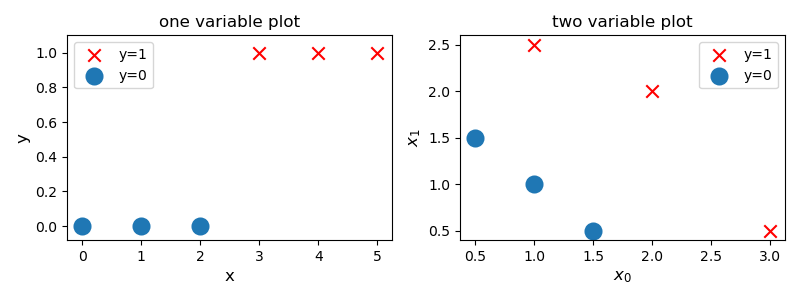

In [15]:
pos = y_train == 1
neg = y_train == 0

fig,ax = plt.subplots(1,2,figsize=(8,3))
#plot 1, single variable
ax[0].scatter(x_train[pos], y_train[pos], marker='x', s=80, c = 'red', label="y=1")
ax[0].scatter(x_train[neg], y_train[neg], marker='o', s=100, label="y=0",lw=3)

ax[0].set_ylim(-0.08,1.1)
ax[0].set_ylabel('y', fontsize=12)
ax[0].set_xlabel('x', fontsize=12)
ax[0].set_title('one variable plot')
ax[0].legend()

#plot 2, two variables
ax[1].scatter(x_train2[y_train2 == 1, 0], x_train2[y_train2 == 1, 1], marker='x', s=80, c='red', label="y=1")
ax[1].scatter(x_train2[y_train2 == 0, 0], x_train2[y_train2 == 0, 1], marker='o', s=100, label="y=0", lw=3)
ax[1].set_ylabel('$x_1$', fontsize=12)
ax[1].set_xlabel('$x_0$', fontsize=12)
ax[1].set_title('two variable plot')
ax[1].legend()
plt.tight_layout()
plt.show()

## Sigmoid or Logistic Function
For a classification task, we can start by using our linear regression model, $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot  \mathbf{x}^{(i)} + b$, to predict $y$ given $x$. 
- However, we would like the predictions of our classification model to be between 0 and 1 since our output variable $y$ is either 0 or 1. 
- This can be accomplished by using a "sigmoid function" which maps all input values to values between 0 and 1. 


Let's implement the sigmoid function and see this for ourselves.

## Formula for Sigmoid function

The formula for a sigmoid function is as follows -  

$g(z) = \frac{1}{1+e^{-z}}\tag{1}$

In the case of logistic regression, z (the input to the sigmoid function), is the output of a linear regression model. 
- In the case of a single example, $z$ is scalar.
- in the case of multiple examples, $z$ may be a vector consisting of $m$ values, one for each example. 
- The implementation of the sigmoid function should cover both of these potential input formats.
Let's implement this in Python.

NumPy has a function called [`exp()`](https://numpy.org/doc/stable/reference/generated/numpy.exp.html), which offers a convenient way to calculate the exponential ( $e^{z}$) of all elements in the input array (`z`).
 
It also works with a single number as an input, as shown below.

In [19]:
# Input is an array. 
input_array = np.array([1,2,3])
exp_array = np.exp(input_array)

print("Input to exp:", input_array)
print("Output of exp:", exp_array)

# Input is a single number
input_val = 1  
exp_val = np.exp(input_val)

print("Input to exp:", input_val)
print("Output of exp:", exp_val)

Input to exp: [1 2 3]
Output of exp: [ 2.71828183  7.3890561  20.08553692]
Input to exp: 1
Output of exp: 2.718281828459045


The `sigmoid` function is implemented in python as shown in the cell below.

In [22]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Args:
        z (ndarray): A scalar, numpy array of any size.

    Returns:
        g (ndarray): sigmoid(z), with the same shape as z
         
    """

    g = 1/(1+np.exp(-z))
   
    return g

Let's see what the output of this function is for various value of `z`

In [25]:
# Generate an array of evenly spaced values between -10 and 10
z_tmp = np.arange(-10,11)

# Use the function implemented above to get the sigmoid values
y = sigmoid(z_tmp)

# Code for pretty printing the two arrays next to each other
#np.set_printoptions(precision=3) 
print("Input (z), Output (sigmoid(z))")
print(np.c_[z_tmp, y])

Input (z), Output (sigmoid(z))
[[-1.00000000e+01  4.53978687e-05]
 [-9.00000000e+00  1.23394576e-04]
 [-8.00000000e+00  3.35350130e-04]
 [-7.00000000e+00  9.11051194e-04]
 [-6.00000000e+00  2.47262316e-03]
 [-5.00000000e+00  6.69285092e-03]
 [-4.00000000e+00  1.79862100e-02]
 [-3.00000000e+00  4.74258732e-02]
 [-2.00000000e+00  1.19202922e-01]
 [-1.00000000e+00  2.68941421e-01]
 [ 0.00000000e+00  5.00000000e-01]
 [ 1.00000000e+00  7.31058579e-01]
 [ 2.00000000e+00  8.80797078e-01]
 [ 3.00000000e+00  9.52574127e-01]
 [ 4.00000000e+00  9.82013790e-01]
 [ 5.00000000e+00  9.93307149e-01]
 [ 6.00000000e+00  9.97527377e-01]
 [ 7.00000000e+00  9.99088949e-01]
 [ 8.00000000e+00  9.99664650e-01]
 [ 9.00000000e+00  9.99876605e-01]
 [ 1.00000000e+01  9.99954602e-01]]


The values in the left column are `z`, and the values in the right column are `sigmoid(z)`. As you can see, the input values to the sigmoid range from -10 to 10, and the output values range from 0 to 1. 

Now, let's try to plot this function using the `matplotlib` library.

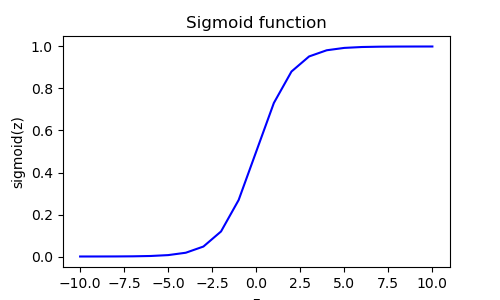

In [28]:
# Plot z vs sigmoid(z)
fig,ax = plt.subplots(1,1,figsize=(5,3))
ax.plot(z_tmp, y, c="b")

ax.set_title("Sigmoid function")
ax.set_ylabel('sigmoid(z)')
ax.set_xlabel('z')
plt.show()

As you can see, the sigmoid function approaches  `0` as `z` goes to large negative values and approaches `1` as `z` goes to large positive values.

## Logistic Regression
A logistic regression model applies the sigmoid to the familiar linear regression model as shown below:

$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot \mathbf{x}^{(i)} + b ) \tag{2} $$ 

  where

  $g(z) = \frac{1}{1+e^{-z}}\tag{3}$

  
Let's apply logistic regression to the categorical data example of tumor classification.  
First, load the examples and initial values for the parameters.
  

`Classes` provide a means of bundling data and functionality together. Creating a new class creates a new type of object, allowing new instances of that type to be made. Each class instance can have attributes attached to it for maintaining its state. Class instances can also have methods (defined by its class) for modifying its state.

Compared with other programming languages, Python’s class mechanism adds classes with a minimum of new syntax and semantics. It is a mixture of the class mechanisms found in C++ and Modula-3. Python classes provide all the standard features of Object Oriented Programming: the class inheritance mechanism allows multiple base classes, a derived class can override any methods of its base class or classes, and a method can call the method of a base class with the same name. Objects can contain arbitrary amounts and kinds of data. As is true for modules, classes partake of the dynamic nature of Python: they are created at runtime, and can be modified further after creation.

In [34]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations

    def sigmoid(self, z):
        """Sigmoid function to map values to probabilities."""
        return 1 / (1 + np.exp(-z))

    def compute_cost(self, y, y_pred):
        """Compute the cross-entropy cost function."""
        m = len(y)
        cost = (-1/m) * np.sum(y * np.log(y_pred + 1e-8) + (1 - y) * np.log(1 - y_pred + 1e-8))
        return cost

    def fit(self, X, y):
        """Train the logistic regression model using gradient descent."""
        m, n = X.shape
        self.W = np.zeros(n)
        self.b = 0

        for _ in range(self.num_iterations):
            # Forward propagation
            Z = np.dot(X, self.W) + self.b
            A = self.sigmoid(Z)

            # Compute cost
            cost = self.compute_cost(y, A)

            # Compute gradients
            dW = (1 / m) * np.dot(X.T, (A - y))
            db = (1 / m) * np.sum(A - y)

            # Update parameters
            self.W -= self.learning_rate * dW
            self.b -= self.learning_rate * db

            if _ % 100 == 0:
                print(f"Iteration {_}: Cost {cost}")

    def predict(self, X):
        """Predict binary labels for the given data."""
        Z = np.dot(X, self.W) + self.b
        A = self.sigmoid(Z)
        return (A > 0.5).astype(int)

### LogisticRegression Class

This Python class implements a basic Logistic Regression model using gradient descent. It includes the following methods:

1. **`__init__`**: Initializes the model with a learning rate and number of iterations for training.

2. **`sigmoid`**: Applies the sigmoid function to map values to probabilities, crucial for logistic regression.

3. **`compute_cost`**: Calculates the cross-entropy cost function to measure the model's performance.

4. **`fit`**: Trains the model using gradient descent. It updates weights and bias by minimizing the cost function through multiple iterations.

5. **`predict`**: Predicts binary labels for new data based on the trained model.

The `fit` method performs forward propagation to compute predictions and cost, calculates gradients, and updates the model parameters. The `predict` method uses the learned parameters to classify new data.

---

# Manually create synthetic data

In [38]:
# Manually create synthetic data
np.random.seed(42)
X = np.array([
    [0.5, 1.5], [1, 1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5],
    [1.5, 1.5], [2.5, 0.5], [0.5, 2], [1.5, 2], [2, 1.5], [2.5, 2.5]
])
y = np.array([0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1])

# Initialize and train the model
- It's not the sklearn model, it's the class that i created just recently in the above cell

In [41]:
# Initialize and train the model
model = LogisticRegression(learning_rate=0.1, num_iterations=1000)
model.fit(X, y)

# Predict
predictions = model.predict(X)

Iteration 0: Cost 0.6931471605599453
Iteration 100: Cost 0.5244756717081636
Iteration 200: Cost 0.486418517810033
Iteration 300: Cost 0.4558264122678091
Iteration 400: Cost 0.43090486230598196
Iteration 500: Cost 0.41036590937443407
Iteration 600: Cost 0.3932539992254836
Iteration 700: Cost 0.37885368919230406
Iteration 800: Cost 0.36662389882522073
Iteration 900: Cost 0.35615074638206534


## Logistic regression model


* Suppose you'd like to train a logistic regression model on this data which has the form   

  $f(x) = g(w_0x_0+w_1x_1 + b)$
  
  where $g(z) = \frac{1}{1+e^{-z}}$, which is the sigmoid function


* Let's say that you trained the model and get the parameters as $b = -3, w_0 = 1, w_1 = 1$. That is,

  $f(x) = g(x_0+x_1-3)$

  (You'll learn how to fit these parameters to the data further in the course)
  
  
Let's try to understand what this trained model is predicting by plotting its decision boundary

### Refresher on logistic regression and decision boundary

* Recall that for logistic regression, the model is represented as 

  $$f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot \mathbf{x}^{(i)} + b) \tag{1}$$

  where $g(z)$ is known as the sigmoid function and it maps all input values to values between 0 and 1:

  $g(z) = \frac{1}{1+e^{-z}}\tag{2}$
  and $\mathbf{w} \cdot \mathbf{x}$ is the vector dot product:
  
  $$\mathbf{w} \cdot \mathbf{x} = w_0 x_0 + w_1 x_1$$
  
  
 * We interpret the output of the model ($f_{\mathbf{w},b}(x)$) as the probability that $y=1$ given $\mathbf{x}$ and parameterized by $\mathbf{w}$ and $b$.
* Therefore, to get a final prediction ($y=0$ or $y=1$) from the logistic regression model, we can use the following heuristic -

  if $f_{\mathbf{w},b}(x) >= 0.5$, predict $y=1$
  
  if $f_{\mathbf{w},b}(x) < 0.5$, predict $y=0$

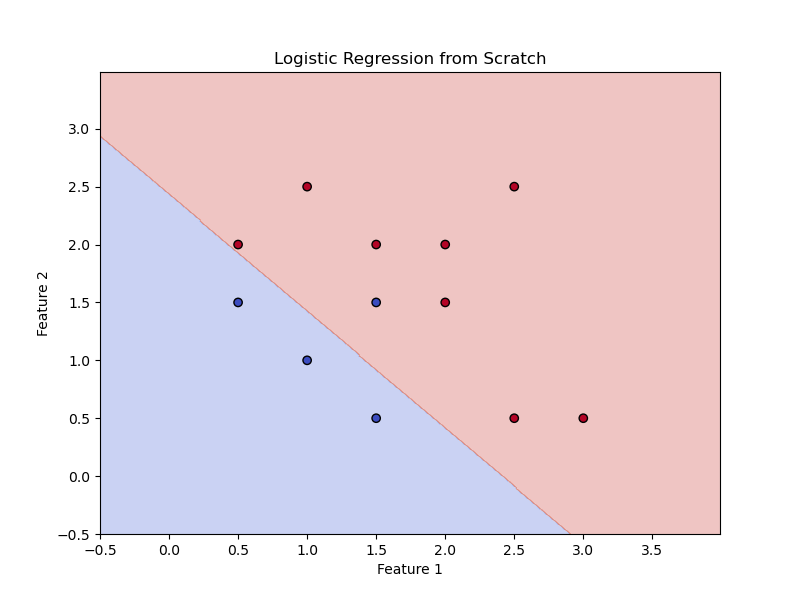

In [46]:
# Plotting
plt.figure(figsize=(8, 6))

# Plot decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

# Plot data points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='coolwarm')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression from Scratch')
plt.show()

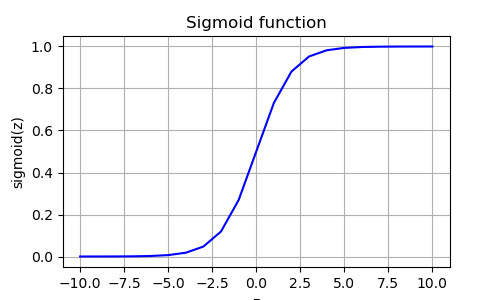

In [48]:
# Plot sigmoid(z) over a range of values from -10 to 10
z = np.arange(-10,11)

fig,ax = plt.subplots(1,1,figsize=(5,3))
# Plot z vs sigmoid(z)
ax.plot(z, sigmoid(z), c="b")

ax.set_title("Sigmoid function")
ax.set_ylabel('sigmoid(z)')
ax.set_xlabel('z')
plt.grid(True)
plt.show()

* As you can see, $g(z) >= 0.5$ for $z >=0$

* For a logistic regression model, $z = \mathbf{w} \cdot \mathbf{x} + b$. Therefore,

  if $\mathbf{w} \cdot \mathbf{x} + b >= 0$, the model predicts $y=1$
  
  if $\mathbf{w} \cdot \mathbf{x} + b < 0$, the model predicts $y=0$
  
  
  
### Plotting decision boundary

Now, let's go back to our example to understand how the logistic regression model is making predictions.

* Our logistic regression model has the form

  $f(\mathbf{x}) = g(-3 + x_0+x_1)$


* From what you've learnt above, you can see that this model predicts $y=1$ if $-3 + x_0+x_1 >= 0$

Let's see what this looks like graphically. We'll start by plotting $-3 + x_0+x_1 = 0$, which is equivalent to $x_1 = 3 - x_0$.


* In the plot above, the blue line represents the line $x_0 + x_1 - 3 = 0$ and it should intersect the x1 axis at 3 (if we set $x_1$ = 3, $x_0$ = 0) and the x0 axis at 3 (if we set $x_1$ = 0, $x_0$ = 3). 


* The shaded region represents $-3 + x_0+x_1 < 0$. The region above the line is $-3 + x_0+x_1 > 0$.


* Any point in the shaded region (under the line) is classified as $y=0$.  Any point on or above the line is classified as $y=1$. This line is known as the "decision boundary".

As we've seen in the lectures, by using higher order polynomial terms (eg: $f(x) = g( x_0^2 + x_1 -1)$, we can come up with more complex non-linear boundaries.

## Squared error for logistic regression?
Recall for **Linear** Regression we have used the **squared error cost function**:
The equation for the squared error cost with one variable is:
  $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 \tag{1}$$ 
 
where 
  $$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{2}$$

Squared error cost: 0.125


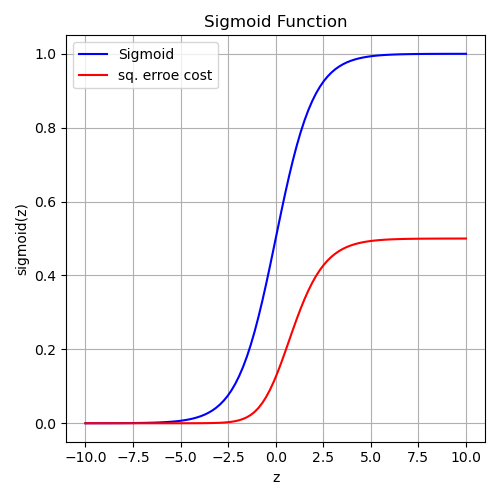

In [53]:
def squared_error_cost(X, y, W, b):
    """Compute the squared error cost function."""
    m = len(y)
    predictions = sigmoid(np.dot(X, W) + b)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

# Example data
X = np.array([
    [0.5, 1.5], [1, 1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]
])
y = np.array([0, 0, 0, 1, 1, 1])

# Initialize parameters
W = np.zeros(X.shape[1])  # Weights
b = 0  # Bias

# Compute squared error cost
cost = squared_error_cost(X, y, W, b)
print(f"Squared error cost: {cost}")

# Plotting sigmoid function and squared error cost function

# Values for sigmoid function
z = np.linspace(-10, 10, 100)
sigmoid_values = sigmoid(z)

# Calculate cost for different z values
# To calculate costs correctly, use a dummy sample with the same size as y
dummy_y = np.zeros_like(sigmoid_values)  # Dummy y values for plotting
costs = (1 / (2 * len(dummy_y))) * np.sum((sigmoid_values[:, np.newaxis] - dummy_y) ** 2, axis=1)

# Plot sigmoid function
fig = plt.figure(figsize=(5, 5))

# Plot 
plt.plot(z, sigmoid_values, c="b", label = "Sigmoid")
plt.plot(z, costs, c="r", label = "sq. erroe cost")
plt.title("Sigmoid Function")
plt.xlabel('z')
plt.ylabel('sigmoid(z)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Recall, the squared error cost had the nice property that following the derivative of the cost leads to the minimum.

This cost function worked well for linear regression, it is natural to consider it for logistic regression as well. However, as the slide above points out, $f_{wb}(x)$ now has a non-linear component, the sigmoid function:   $f_{w,b}(x^{(i)}) = sigmoid(wx^{(i)} + b )$.   Let's try a squared error cost on the example from an earlier lab, now including the sigmoid.

Here is our training data:

Now, let's get a surface plot of the cost using a *squared error cost*:
  $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 $$ 
 
where 
  $$f_{w,b}(x^{(i)}) = sigmoid(wx^{(i)} + b )$$

While this produces a pretty interesting plot, the surface above not nearly as smooth as the 'soup bowl' from linear regression!

Logistic regression requires a cost function more suitable to its non-linear nature. This starts with a Loss function. This is described below.

## Logistic Loss Function

Logistic Regression uses a loss function more suited to the task of categorization where the target is 0 or 1 rather than any number. 

>**Definition Note:**   In this course, these definitions are used:  
**Loss** is a measure of the difference of a single example to its target value while the  
**Cost** is a measure of the losses over the training set


This is defined: 
* $loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$ is the cost for a single data point, which is:

\begin{equation}
  loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = \begin{cases}
    - \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) & \text{if $y^{(i)}=1$}\\
    - \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) & \text{if $y^{(i)}=0$}
  \end{cases}
\end{equation}


*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target value.

*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot\mathbf{x}^{(i)}+b)$ where function $g$ is the sigmoid function.

The defining feature of this loss function is the fact that it uses two separate curves. One for the case when the target is zero or ($y=0$) and another for when the target is one ($y=1$). Combined, these curves provide the behavior useful for a loss function, namely, being zero when the prediction matches the target and rapidly increasing in value as the prediction differs from the target. Consider the curves below:

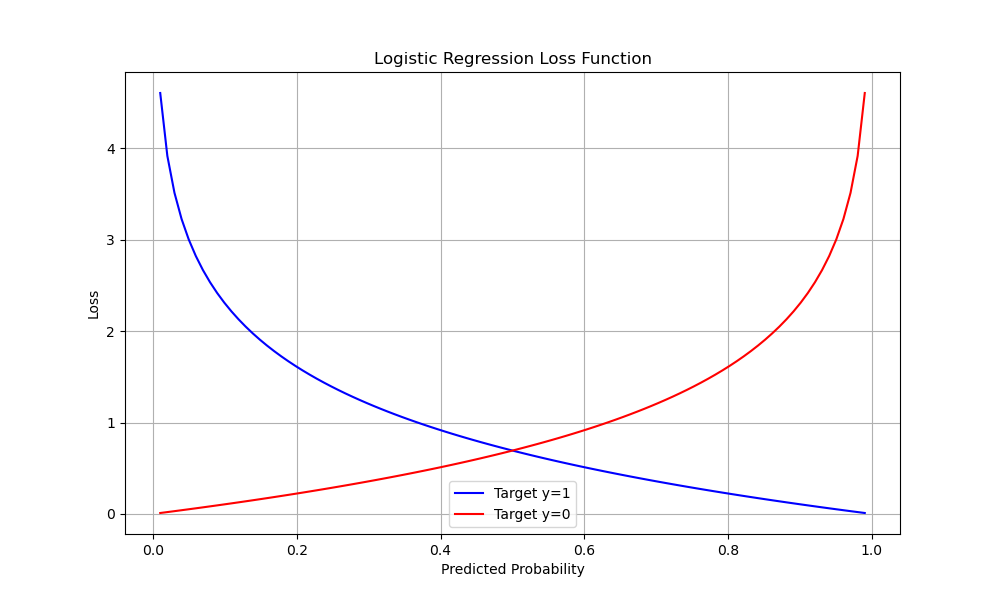

In [61]:
def logistic_loss(prediction, y):
    """Compute logistic loss given prediction and actual label."""
    if y == 1:
        return -np.log(prediction)
    else:
        return -np.log(1 - prediction)

# Generate a range of predicted probabilities
predictions = np.linspace(0.01, 0.99, 100)

# Compute loss for target y=1 and y=0
loss_y1 = [logistic_loss(p, 1) for p in predictions]
loss_y0 = [logistic_loss(p, 0) for p in predictions]

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(predictions, loss_y1, label='Target y=1', color='blue')
plt.plot(predictions, loss_y0, label='Target y=0', color='red')
plt.xlabel('Predicted Probability')
plt.ylabel('Loss')
plt.title('Logistic Regression Loss Function')
plt.legend()
plt.grid(True)
plt.show()

Combined, the curves are similar to the quadratic curve of the squared error loss. Note, the x-axis is $f_{\mathbf{w},b}$ which is the output of a sigmoid. The sigmoid output is strictly between 0 and 1.

The loss function above can be rewritten to be easier to implement.
    $$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = (-y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)$$
  
This is a rather formidable-looking equation. It is less daunting when you consider $y^{(i)}$ can have only two values, 0 and 1. One can then consider the equation in two pieces:  
when $ y^{(i)} = 0$, the left-hand term is eliminated:
$$
\begin{align}
loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), 0) &= (-(0) \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - 0\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \\
&= -\log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)
\end{align}
$$
and when $ y^{(i)} = 1$, the right-hand term is eliminated:
$$
\begin{align}
  loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), 1) &=  (-(1) \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - 1\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)\\
  &=  -\log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)
\end{align}
$$

OK, with this new logistic loss function, a cost function can be produced that incorporates the loss from all the examples.

# Cost Function for Logistic Regression

## Dataset 
Let's start with the same dataset as was used in the decision boundary lab.

In [67]:
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])  #(m,n)
y_train = np.array([0, 0, 0, 1, 1, 1]) 
X_train.shape

(6, 2)

## Cost function

In a previous lab, you developed the *logistic loss* function. Recall, loss is defined to apply to one example. Here you combine the losses to form the **cost**, which includes all the examples.


Recall that for logistic regression, the cost function is of the form 

$$ J(\mathbf{w},b) = \frac{1}{m} \sum_{i=0}^{m-1} \left[ loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right] \tag{1}$$

where
* $loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$ is the cost for a single data point, which is:

    $$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = -y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \tag{2}$$
    
*  where m is the number of training examples in the data set and:
$$
\begin{align}
  f_{\mathbf{w},b}(\mathbf{x^{(i)}}) &= g(z^{(i)})\tag{3} \\
  z^{(i)} &= \mathbf{w} \cdot \mathbf{x}^{(i)}+ b\tag{4} \\
  g(z^{(i)}) &= \frac{1}{1+e^{-z^{(i)}}}\tag{5} 
\end{align}
$$

<a name='ex-02'></a>
#### Code Description

The algorithm for `compute_cost_logistic` loops over all the examples calculating the loss for each example and accumulating the total.

Note that the variables X and y are not scalar values but matrices of shape ($m, n$) and ($𝑚$,) respectively, where  $𝑛$ is the number of features and $𝑚$ is the number of training examples.


In [71]:
def compute_cost_logistic(X, y, w, b):
    """
    Computes cost

    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """

    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        z_i = np.dot(X[i],w) + b
        f_wb_i = sigmoid(z_i)
        cost +=  -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)
             
    cost = cost / m
    return cost


Check the implementation of the cost function using the cell below.

In [74]:
w_tmp = np.array([1,1])
b_tmp = -3
print(compute_cost_logistic(X_train, y_train, w_tmp, b_tmp))

0.36686678640551745


In [76]:
# change the b value and see the cost
w_array1 = np.array([1,1])
b_1 = -3
w_array2 = np.array([1,1])
b_2 = -4

print("Cost for b = -3 : ", compute_cost_logistic(X_train, y_train, w_array1, b_1))
print("Cost for b = -4 : ", compute_cost_logistic(X_train, y_train, w_array2, b_2))

Cost for b = -3 :  0.36686678640551745
Cost for b = -4 :  0.5036808636748461


You can see the cost function behaves as expected and the cost for `b = -4, w = np.array([1,1])` is indeed higher than the cost for `b = -3, w = np.array([1,1])`

# Gradient Descent for Logistic Regression

## Data set 
Let's start with the same two feature data set used in the decision boundary lab.

In [81]:
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1])

## Logistic Gradient Descent
<img align="right" src="./images/C1_W3_Logistic_gradient_descent.png"     style=" width:400px; padding: 10px; " >

Recall the gradient descent algorithm utilizes the gradient calculation:
$$\begin{align*}
&\text{repeat until convergence:} \; \lbrace \\
&  \; \; \;w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{1}  \; & \text{for j := 0..n-1} \\ 
&  \; \; \;  \; \;b = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \\
&\rbrace
\end{align*}$$

Where each iteration performs simultaneous updates on $w_j$ for all $j$, where
$$\begin{align*}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{2} \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{3} 
\end{align*}$$

* m is the number of training examples in the data set      
* $f_{\mathbf{w},b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target
* For a logistic regression model  
    $z = \mathbf{w} \cdot \mathbf{x} + b$  
    $f_{\mathbf{w},b}(x) = g(z)$  
    where $g(z)$ is the sigmoid function:  
    $g(z) = \frac{1}{1+e^{-z}}$   
    


### Gradient Descent Implementation
The gradient descent algorithm implementation has two components: 
- The loop implementing equation (1) above. This is `gradient_descent` below and is generally provided to you in optional and practice labs.
- The calculation of the current gradient, equations (2,3) above. This is `compute_gradient_logistic` below. You will be asked to implement this week's practice lab.

#### Calculating the Gradient, Code Description
Implements equation (2),(3) above for all $w_j$ and $b$.
There are many ways to implement this. Outlined below is this:
- initialize variables to accumulate `dj_dw` and `dj_db`
- for each example
    - calculate the error for that example $g(\mathbf{w} \cdot \mathbf{x}^{(i)} + b) - \mathbf{y}^{(i)}$
    - for each input value $x_{j}^{(i)}$ in this example,  
        - multiply the error by the input  $x_{j}^{(i)}$, and add to the corresponding element of `dj_dw`. (equation 2 above)
    - add the error to `dj_db` (equation 3 above)

- divide `dj_db` and `dj_dw` by total number of examples (m)
- note that $\mathbf{x}^{(i)}$ in numpy `X[i,:]` or `X[i]`  and $x_{j}^{(i)}$ is `X[i,j]`

In [85]:
def compute_gradient_logistic(X, y, w, b): 
    """
    Computes the gradient for linear regression 
 
    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters  
      b (scalar)      : model parameter
    Returns
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar)      : The gradient of the cost w.r.t. the parameter b. 
    """
    m,n = X.shape
    dj_dw = np.zeros((n,))                           #(n,)
    dj_db = 0.

    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b)          #(n,)(n,)=scalar
        err_i  = f_wb_i  - y[i]                       #scalar
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]      #scalar
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m                                   #(n,)
    dj_db = dj_db/m                                   #scalar
        
    return dj_db, dj_dw  

In [87]:
X_tmp = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_tmp = np.array([0, 0, 0, 1, 1, 1])
w_tmp = np.array([2.,3.])
b_tmp = 1.
dj_db_tmp, dj_dw_tmp = compute_gradient_logistic(X_tmp, y_tmp, w_tmp, b_tmp)
print(f"dj_db: {dj_db_tmp}" )
print(f"dj_dw: {dj_dw_tmp.tolist()}" )

dj_db: 0.49861806546328574
dj_dw: [0.498333393278696, 0.49883942983996693]


#### Gradient Descent Code 

In [111]:
def gradient_descent(X, y, w_in, b_in, alpha, num_iters): 
    """
    Performs batch gradient descent
    
    Args:
      X (ndarray (m,n)   : Data, m examples with n features
      y (ndarray (m,))   : target values
      w_in (ndarray (n,)): Initial values of model parameters  
      b_in (scalar)      : Initial values of model parameter
      alpha (float)      : Learning rate
      num_iters (scalar) : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,))   : Updated values of parameters
      b (scalar)         : Updated value of parameter 
    """
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  # Avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters
        dj_db, dj_dw = compute_gradient_logistic(X, y, w, b)   

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               
      
        # Save cost J at each iteration
        if i < 100000:  # Prevent resource exhaustion 
            J_history.append(compute_cost_logistic(X, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i % math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i}: Cost {J_history[-1]}")
        
    return w, b, J_history  # Return final w, b, and J history for graphing

# Example usage
# Generating synthetic data for demonstration
np.random.seed(0)
X_train = np.random.rand(100, 2)  # 100 examples with 2 features
y_train = (np.random.rand(100) > 0.5).astype(int)  # Binary target values

w_tmp = np.zeros(X_train.shape[1])
b_tmp = 0.
alpha = 0.1
num_iters = 10000

w_out, b_out, _ = gradient_descent(X_train, y_train, w_tmp, b_tmp, alpha, num_iters) 
print(f"\nUpdated parameters: w: {w_out}, b: {b_out}")

Iteration 0: Cost 0.6931139042455983
Iteration 1000: Cost 0.6853793603628874
Iteration 2000: Cost 0.6851082908823644
Iteration 3000: Cost 0.6850899619394181
Iteration 4000: Cost 0.6850884094967381
Iteration 5000: Cost 0.6850882717412836
Iteration 6000: Cost 0.6850882594151093
Iteration 7000: Cost 0.6850882583105475
Iteration 8000: Cost 0.6850882582115405
Iteration 9000: Cost 0.6850882582026653

Updated parameters: w: [-0.11639995  0.88081288], b: -0.3689904789709112


## Another Data set
Let's return to a one-variable data set. With just two parameters, $w$, $b$, it is possible to plot the cost function using a contour plot to get a better idea of what gradient descent is up to.

In [92]:
x_train = np.array([0., 1, 2, 3, 4, 5])
y_train = np.array([0,  0, 0, 1, 1, 1])

As before, we'll use a helper function to plot this data. The data points with label $y=1$ are shown as red crosses, while the data points with label $y=0$ are shown as blue circles.

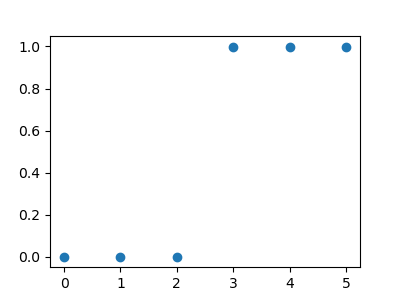

In [94]:
fig = plt.figure(figsize=(4,3))
plt.scatter(x_train, y_train)
plt.show()

# Regularized Cost and Gradient

## Cost functions with regularization
### Cost function for regularized linear regression

The equation for the cost function regularized linear regression is:
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2  + \frac{\lambda}{2m}  \sum_{j=0}^{n-1} w_j^2 \tag{1}$$ 
where:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b  \tag{2} $$ 


Compare this to the cost function without regularization (which you implemented in  a previous lab), which is of the form:

$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 $$ 

The difference is the regularization term,  <span style="color:blue">
    $\frac{\lambda}{2m}  \sum_{j=0}^{n-1} w_j^2$ </span> 
    
Including this term encourages gradient descent to minimize the size of the parameters. Note, in this example, the parameter $b$ is not regularized. This is standard practice.

Below is an implementation of equations (1) and (2). Note that this uses a *standard pattern for this course*,   a `for loop` over all `m` examples.

In [100]:
def compute_cost_linear_reg(X, y, w, b, lambda_ = 1):
    """
    Computes the cost over all examples
    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters  
      b (scalar)      : model parameter
      lambda_ (scalar): Controls amount of regularization
    Returns:
      total_cost (scalar):  cost 
    """

    m  = X.shape[0]
    n  = len(w)
    cost = 0.
    for i in range(m):
        f_wb_i = np.dot(X[i], w) + b                                   #(n,)(n,)=scalar, see np.dot
        cost = cost + (f_wb_i - y[i])**2                               #scalar             
    cost = cost / (2 * m)                                              #scalar  
 
    reg_cost = 0
    for j in range(n):
        reg_cost += (w[j]**2)                                          #scalar
    reg_cost = (lambda_/(2*m)) * reg_cost                              #scalar
    
    total_cost = cost + reg_cost                                       #scalar
    return total_cost                                                  #scalar

In [102]:
np.random.seed(1)
X_tmp = np.random.rand(5,6)
y_tmp = np.array([0,1,0,1,0])
w_tmp = np.random.rand(X_tmp.shape[1]).reshape(-1,)-0.5
b_tmp = 0.5
lambda_tmp = 0.7
cost_tmp = compute_cost_linear_reg(X_tmp, y_tmp, w_tmp, b_tmp, lambda_tmp)

print("Regularized cost:", cost_tmp)

Regularized cost: 0.07917239320214275


### Cost function for regularized logistic regression
For regularized **logistic** regression, the cost function is of the form
$$J(\mathbf{w},b) = \frac{1}{m}  \sum_{i=0}^{m-1} \left[ -y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \right] + \frac{\lambda}{2m}  \sum_{j=0}^{n-1} w_j^2 \tag{3}$$
where:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = sigmoid(\mathbf{w} \cdot \mathbf{x}^{(i)} + b)  \tag{4} $$ 

Compare this to the cost function without regularization (which you implemented in  a previous lab):

$$ J(\mathbf{w},b) = \frac{1}{m}\sum_{i=0}^{m-1} \left[ (-y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)\right] $$

As was the case in linear regression above, the difference is the regularization term, which is    <span style="color:blue">
    $\frac{\lambda}{2m}  \sum_{j=0}^{n-1} w_j^2$ </span> 

Including this term encourages gradient descent to minimize the size of the parameters. Note, in this example, the parameter $b$ is not regularized. This is standard practice. 

In [105]:
def compute_cost_logistic_reg(X, y, w, b, lambda_ = 1):
    """
    Computes the cost over all examples
    Args:
    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters  
      b (scalar)      : model parameter
      lambda_ (scalar): Controls amount of regularization
    Returns:
      total_cost (scalar):  cost 
    """

    m,n  = X.shape
    cost = 0.
    for i in range(m):
        z_i = np.dot(X[i], w) + b                                      #(n,)(n,)=scalar, see np.dot
        f_wb_i = sigmoid(z_i)                                          #scalar
        cost +=  -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)      #scalar
             
    cost = cost/m                                                      #scalar

    reg_cost = 0
    for j in range(n):
        reg_cost += (w[j]**2)                                          #scalar
    reg_cost = (lambda_/(2*m)) * reg_cost                              #scalar
    
    total_cost = cost + reg_cost                                       #scalar
    return total_cost                                                  #scalar

Run the cell below to see it in action.

In [108]:
np.random.seed(1)
X_tmp = np.random.rand(5,6)
y_tmp = np.array([0,1,0,1,0])
w_tmp = np.random.rand(X_tmp.shape[1]).reshape(-1,)-0.5
b_tmp = 0.5
lambda_tmp = 0.7
cost_tmp = compute_cost_logistic_reg(X_tmp, y_tmp, w_tmp, b_tmp, lambda_tmp)

print("Regularized cost:", cost_tmp)

Regularized cost: 0.6850849138741673
